In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import ttest_ind

# Kigali, Rwanda Analysis

In [2]:
file_path = "kigali-us embassy-air-quality.csv"
# read rwanda_data
rwanda_data = pd.read_csv(file_path, skipinitialspace=True)

# convert date to datetime
rwanda_data["date"] = pd.to_datetime(rwanda_data["date"])
rwanda_data = rwanda_data.rename(columns={"date":"Date", "pm25":"PM25"})

rwanda_data.head()

,Date,PM25
0,2024-04-01,119
1,2024-04-02,119
2,2024-04-03,58
3,2024-04-04,104
4,2024-04-05,69


In [3]:
# convert date to day names
rwanda_data["Day Name"] = rwanda_data["Date"].dt.day_name()
rwanda_data.tail()

,Date,PM25,Day Name
585,2022-03-27,90,Sunday
586,2022-03-28,84,Monday
587,2022-03-29,92,Tuesday
588,2022-03-30,64,Wednesday
589,2022-03-31,85,Thursday


In [4]:
# calculate week of the month the day lies in
rwanda_data["Week of Month"] = rwanda_data["Date"].dt.day.apply(lambda day: (day - 1) // 7 + 1)
rwanda_data = rwanda_data.sort_values(by="Date")
rwanda_data.tail()

,Date,PM25,Day Name,Week of Month
20,2024-04-21,78,Sunday,3
21,2024-04-22,71,Monday,4
22,2024-04-23,85,Tuesday,4
23,2024-04-24,73,Wednesday,4
24,2024-04-25,134,Thursday,4


In [5]:
rwanda_data["Week of Month"].nunique()

5

In [6]:
# set date as the index
rwanda_data = rwanda_data.set_index("Date")

In [7]:
# check for missing date values in the df
pd.date_range(start = '2024-04-01', end = '2022-03-31' ).difference(rwanda_data.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [8]:
rwanda_data = rwanda_data.reset_index()

### Mode and central tendency

In [9]:
mode = rwanda_data["PM25"].mode()
print(f"Rwanda pm2.5 Mode:\n{mode}")

mean_value = rwanda_data["PM25"].mean()
print(f"Rwanda pm2.5 Mean: {mean_value}")

max_value = rwanda_data["PM25"].max()
print(f"Rwanda pm2.5 Maximum: {max_value}")

min_value = rwanda_data["PM25"].min()
print(f"Rwanda pm2.5 Minimum: {min_value}")

Rwanda pm2.5 Mode:
0    109
1    111
Name: PM25, dtype: int64
Rwanda pm2.5 Mean: 113.33050847457628
Rwanda pm2.5 Maximum: 173
Rwanda pm2.5 Minimum: 43


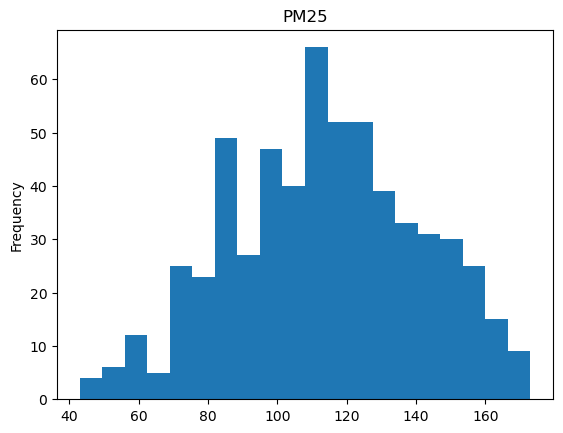

In [10]:
# histogram to visualize distribution

from matplotlib import pyplot as plt
rwanda_data['PM25'].plot(kind='hist', bins=20, title='PM25')
plt.gca().spines[['top', 'right',]].set_visible(True)

In [11]:
# first and 3rd sundays
carfree_sunday_data = rwanda_data[(rwanda_data["Day Name"] == "Sunday") & (rwanda_data["Week of Month"]==1) | (rwanda_data["Day Name"] == "Sunday") & (rwanda_data["Week of Month"]==3)]

carfree_sunday_data = carfree_sunday_data.reset_index(drop=True)

In [12]:
print(f"Car free sundays: {len(carfree_sunday_data)}")

Car free sundays: 38


In [13]:
# other sundays
sunday_data_non_carfree = rwanda_data[(rwanda_data["Day Name"] == "Sunday") & (rwanda_data["Week of Month"] !=1) & (rwanda_data["Day Name"] == "Sunday") & (rwanda_data["Week of Month"] !=3)]

sunday_data_non_carfree = sunday_data_non_carfree.reset_index(drop=True)

sunday_data_non_carfree.head(8)

,Date,PM25,Day Name,Week of Month
0,2022-03-13,117,Sunday,2
1,2022-03-27,90,Sunday,4
2,2022-04-10,111,Sunday,2
3,2022-04-24,43,Sunday,4
4,2022-05-08,100,Sunday,2
5,2022-05-22,119,Sunday,4
6,2022-05-29,73,Sunday,5
7,2022-06-12,113,Sunday,2


In [14]:
print(f"Non-car free sundays: {len(sunday_data_non_carfree)}")

Non-car free sundays: 45


### Mondays after car free Sundays

In [15]:
Monday_data = rwanda_data[(rwanda_data["Day Name"] == "Monday") & (rwanda_data["Week of Month"] ==2) | (rwanda_data["Day Name"] == "Monday") & (rwanda_data["Week of Month"] ==4)]

Monday_data=Monday_data.reset_index(drop=True)
Monday_data.head()

,Date,PM25,Day Name,Week of Month
0,2022-02-28,87,Monday,4
1,2022-03-14,113,Monday,2
2,2022-03-28,84,Monday,4
3,2022-04-11,94,Monday,2
4,2022-04-25,109,Monday,4


### Normal Mondays

In [16]:
Monday_usual = rwanda_data[(rwanda_data["Day Name"] == "Monday") & (rwanda_data["Week of Month"] !=2) & (rwanda_data["Day Name"] == "Monday") & (rwanda_data["Week of Month"] !=4)]

Monday_usual = Monday_usual.reset_index(drop=True)


In [17]:
Monday_usual.head(8)

,Date,PM25,Day Name,Week of Month
0,2022-03-07,110,Monday,1
1,2022-04-04,120,Monday,1
2,2022-04-18,58,Monday,3
3,2022-05-02,107,Monday,1
4,2022-05-16,100,Monday,3
5,2022-05-30,86,Monday,5
6,2022-06-06,125,Monday,1
7,2022-07-04,151,Monday,1


## Saturdays

In [18]:
# Saturdays before car free Sundays
saturday_before = rwanda_data[(rwanda_data["Day Name"] == "Saturday") & (rwanda_data["Week of Month"] == 1) | (rwanda_data["Day Name"] == "Saturday") & (rwanda_data["Week of Month"] ==3)]

saturday_before=saturday_before.reset_index(drop=True)
saturday_before.head()

,Date,PM25,Day Name,Week of Month
0,2022-03-05,107,Saturday,1
1,2022-03-19,155,Saturday,3
2,2022-04-02,113,Saturday,1
3,2022-04-16,83,Saturday,3
4,2022-05-07,70,Saturday,1


In [19]:
# Saturdays after car free Sundays
saturday_after = rwanda_data[(rwanda_data["Day Name"] == "Saturday") & (rwanda_data["Week of Month"] != 1) & (rwanda_data["Day Name"] == "Saturday") & (rwanda_data["Week of Month"] !=3)]

saturday_after=saturday_after.reset_index(drop=True)
saturday_after.head()

,Date,PM25,Day Name,Week of Month
0,2022-03-12,100,Saturday,2
1,2022-03-26,91,Saturday,4
2,2022-04-09,107,Saturday,2
3,2022-04-23,104,Saturday,4
4,2022-04-30,91,Saturday,5


In [20]:
# Saturdays after car free Sundays
saturday_car_free_data = rwanda_data[(rwanda_data["Day Name"] == "Saturday") & (rwanda_data["Week of Month"] != 1) & (rwanda_data["Day Name"] == "Saturday") & (rwanda_data["Week of Month"] !=3)]

saturday_car_free_data=saturday_car_free_data.reset_index(drop=True)
saturday_car_free_data.head()

,Date,PM25,Day Name,Week of Month
0,2022-03-12,100,Saturday,2
1,2022-03-26,91,Saturday,4
2,2022-04-09,107,Saturday,2
3,2022-04-23,104,Saturday,4
4,2022-04-30,91,Saturday,5


### Statistical analysis

In [21]:

# average emission on usual Mondays
average_emission_normal_mondays = Monday_usual["PM25"].mean()
print(f"Average emission on usual Mondays: {average_emission_normal_mondays}")

Average emission on usual Mondays: 112.95121951219512


In [22]:
# average emission on car free Mondays
average_emission_carfree_mondays = Monday_data["PM25"].mean()
print(f"Average emission on Mondays after carfree days: {average_emission_carfree_mondays}")

Average emission on Mondays after carfree days: 109.925


In [23]:
# average emission on car free sundays
average_emission_carfree_sundays = carfree_sunday_data["PM25"].mean()
print(f"Average emission on CAR FREE Sundays: {average_emission_carfree_sundays}")

Average emission on CAR FREE Sundays: 115.44736842105263


In [24]:
# average emission
average_emission_non_carfree_sundays = sunday_data_non_carfree["PM25"].mean()
print(f"Average emission on carfree Sundays: {average_emission_non_carfree_sundays}")

Average emission on carfree Sundays: 110.28888888888889


In [25]:
# average emission on regular sundays
average_emission_carfree_sundays = carfree_sunday_data["PM25"].mean()
print(f"Average emission on CAR FREE Sundays: {average_emission_carfree_sundays}")

Average emission on CAR FREE Sundays: 115.44736842105263


In [26]:
# average emission on regular sundays
average_emission_saturday_before = saturday_before["PM25"].mean()
print(f"Average emission on saturday before CAR FREE Sundays: {average_emission_saturday_before}")

Average emission on saturday before CAR FREE Sundays: 116.1025641025641


In [27]:
# average emission on regular sundays
average_emission_saturday_after = saturday_after["PM25"].mean()
print(f"Average emission on saturday after CAR FREE Sundays: {average_emission_saturday_after}")


Average emission on saturday after CAR FREE Sundays: 119.15217391304348


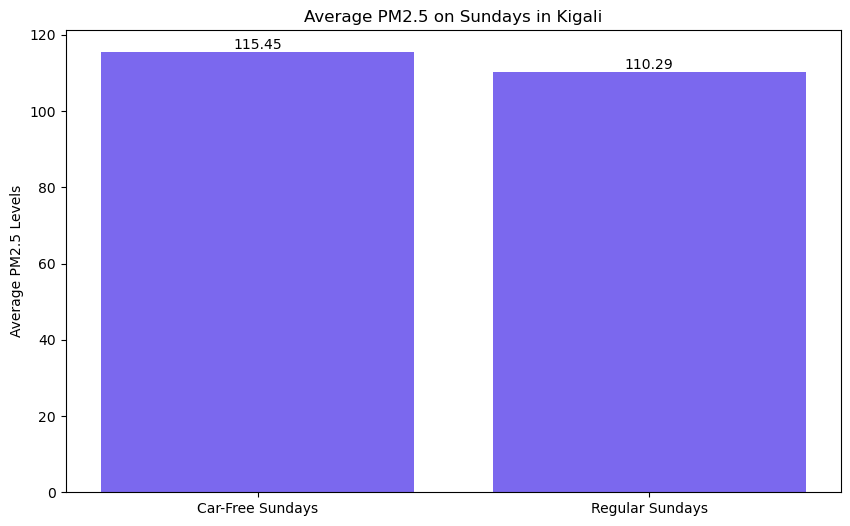

In [28]:
# Create the bar plot with a specific color
plt.figure(figsize=(10, 6))
bars = plt.bar(['Car-Free Sundays', 'Regular Sundays'], [average_emission_carfree_sundays, average_emission_non_carfree_sundays], color='mediumslateblue')  

# Add labels, title, and legend
plt.ylabel('Average PM2.5 Levels')
plt.title('Average PM2.5 on Sundays in Kigali')

# Adding text annotations on each bar
for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')  

# Show the plot
plt.show()

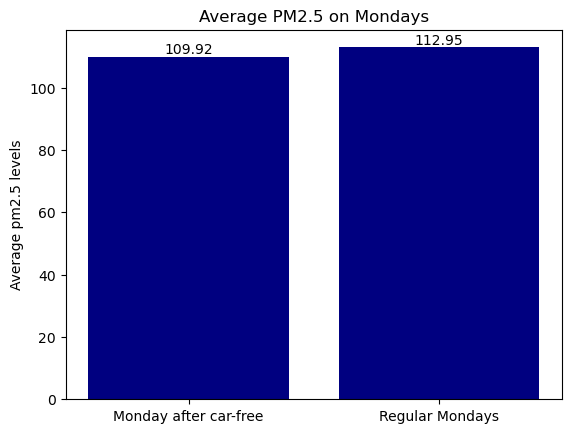

In [29]:
# plt.figure(figsize=(10, 6))
bars = plt.bar(['Monday after car-free', 'Regular Mondays'], [average_emission_carfree_mondays, average_emission_normal_mondays], color = 'navy')
for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')  


# Add labels, title, and legend
plt.ylabel('Average pm2.5 levels')
plt.title('Average PM2.5 on Mondays')
plt.show()

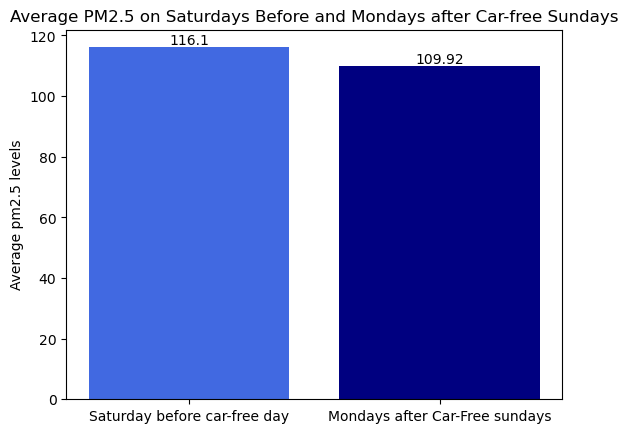

In [30]:
# plt.figure(figsize=(10, 6))
bars = plt.bar(['Saturday before car-free day', 'Mondays after Car-Free sundays'], [average_emission_saturday_before, average_emission_carfree_mondays],  color=['royalblue', 'navy'])

# Add labels, title, and legend
plt.ylabel('Average pm2.5 levels')
# Adding text annotations on each bar
for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')  

plt.title('Average PM2.5 on Saturdays Before and Mondays after Car-free Sundays')
plt.show()

# Kampala, Uganda PM2.5 Analysis

In [31]:
# Load data.

file_path2 = "kampala-us embassy-air-quality.csv"

kampala_data = pd.read_csv(file_path2, skipinitialspace=True)

In [32]:
kampala_data.columns

Index(['date', 'pm25'], dtype='object')

In [33]:
# convert date to datetime

kampala_data["date"] = pd.to_datetime(kampala_data["date"])

kampala_data = kampala_data.rename(columns={"date":"Date", "pm25":"PM25"})
# sort data
# kampala_data = kampala_data.sort_values(by="Date")

kampala_data  = kampala_data.reset_index(drop=True)

In [34]:
nairobi_path = "nairobi-us embassy-air-quality.csv"

nairobi_data = pd.read_csv(nairobi_path, skipinitialspace=True)

# convert date to datetime
nairobi_data["date"] = pd.to_datetime(nairobi_data["date"])
nairobi_data = nairobi_data.rename(columns={"date":"Date", "pm25":"PM25"})

In [35]:
# merge all 3 data frames
final_df = rwanda_data.merge(kampala_data, on="Date", suffixes=("_Kigali", "_Kampala")).merge(nairobi_data, on="Date", suffixes=("", "_Nairobi"))

#final_df = rwanda_data.merge(kampala_data, suffixes=("_Kigali", "_Kampala").merge(),on="Date")
final_df = final_df.rename(columns={"PM25":"PM25_Nairobi"})
final_df.head()

,Date,PM25_Kigali,Day Name,Week of Month,PM25_Kampala,PM25_Nairobi
0,2022-02-28,87,Monday,4,123,54
1,2022-03-01,97,Tuesday,1,125,51
2,2022-03-02,81,Wednesday,1,116,60
3,2022-03-03,105,Thursday,1,97,74
4,2022-03-04,112,Friday,1,96,75


**Comparing KIgali's and Kampala's box plots**

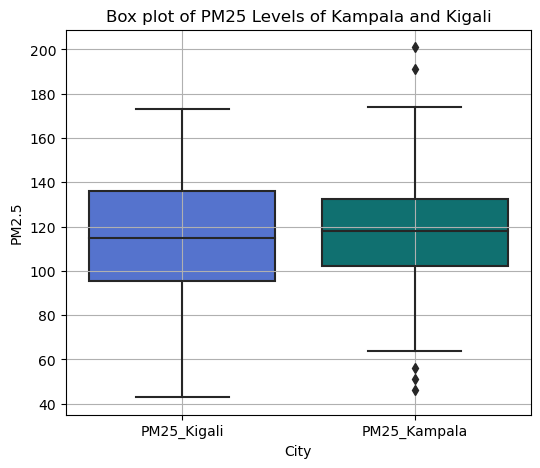

In [36]:
# Melt the DataFrame to long format
df_long = pd.melt(final_df, id_vars='Date', value_vars=['PM25_Kigali', 'PM25_Kampala'],
                  var_name='City', value_name='PM25')

colors = ['royalblue','teal']
# Plotting the box plots
plt.figure(figsize=(6, 5))
sns.boxplot(x='City', y='PM25', data=df_long, palette=colors)
plt.title('Box plot of PM25 Levels of Kampala and Kigali')

plt.ylabel('PM2.5')
plt.grid('--')
plt.xlabel('City')
plt.show()

**Insights from box plots above**

- Kampala has a higher median PM2.5 level than Kigali, which suggests that on a typical day, Kampala experiences higher air pollution. This might indicate more consistent exposure to pollutants, potentially due to factors like higher traffic volume, industrial activity.

- Kigali, has a lower median, and it can be suspected that the interventions like car-free Sundays might be having a positive effect on reducing the median pollution levels.

 - It is also evident on Kampala's box plot that the city has some PM2.5 levels that can be considered to be outliers. These points exist at both the lower end and upper end of the plot.

**Comparing Kigali's and Kampala's histograms**

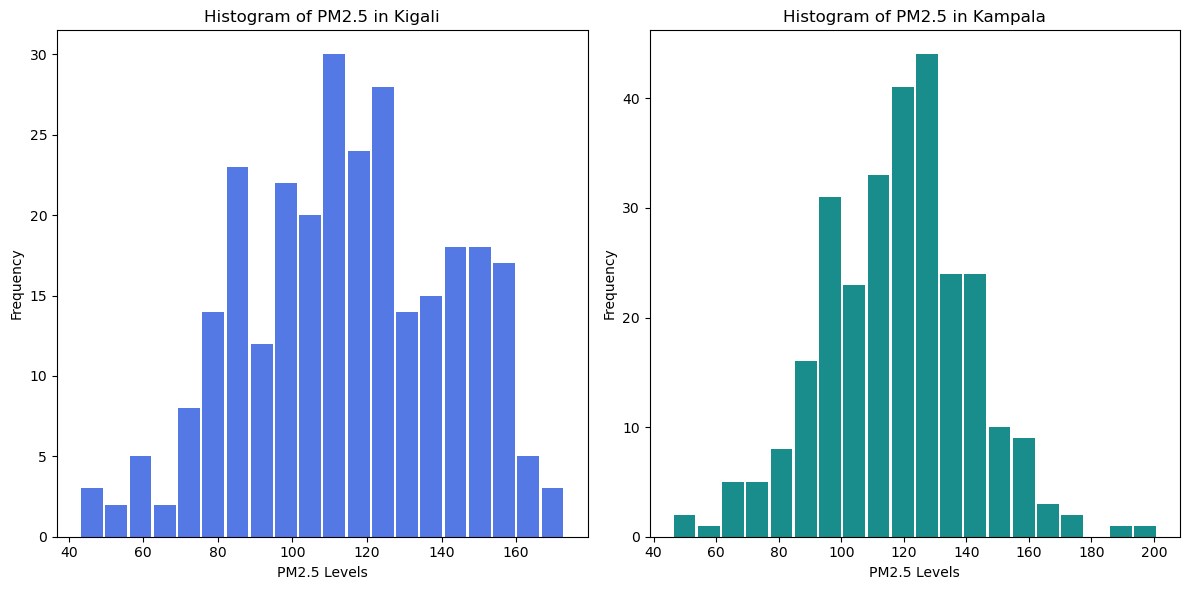

In [37]:

# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns for subplots

# Histogram for Kigali
axes[0].hist(final_df['PM25_Kigali'], bins=20, color='royalblue', alpha=0.9, rwidth=0.9)
axes[0].set_title('Histogram of PM2.5 in Kigali')
axes[0].set_xlabel('PM2.5 Levels')
axes[0].set_ylabel('Frequency')

# Histogram for Kampala
axes[1].hist(final_df['PM25_Kampala'], bins=20, color='teal', alpha=0.9, rwidth=0.9)
axes[1].set_title('Histogram of PM2.5 in Kampala')
axes[1].set_xlabel('PM2.5 Levels')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


**Insights**

- Kigali's PM2.5 levels range from about 40 to slightly above 160.

- The PM2.5 levels in Kampala extend from about 40 to around 200. This is an indicator that Kampala experiences higher extremes of PM2.5 levels compared to Kigali.

- Kampala's distribution is somehow right skewed. This implies the city experiences some extreme levels of PM2.5.

- Kigali’s PM2.5  has multiple peaks, which implies a distribution influenced by various factors, making predictions about air quality more complex and uncertain. This is an important consideration for environmental management and planning, as more predictable distributions allow for better resource allocation and intervention planning.

- On the hand, Kampala has a more pronounced central peak and less severe skewness, which makes it more predictable. The data clustering around a central range of 120-140 suggests more consistent conditions affecting PM2.5 levels

### Time series plots

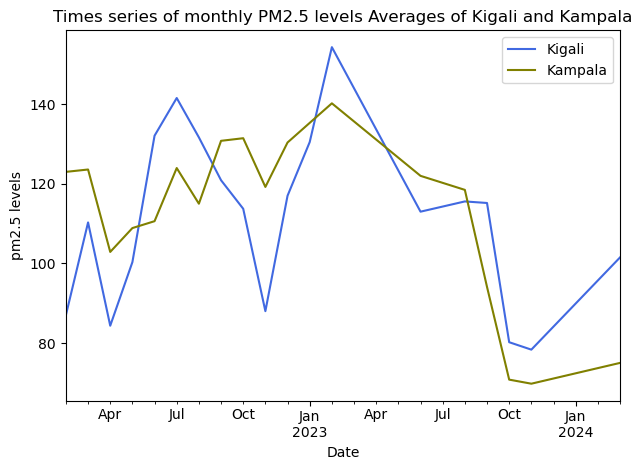

In [38]:
# plot 3 time series for monthly averages
monthly_avg_kigali = final_df.groupby(final_df["Date"].dt.to_period("M"))["PM25_Kigali"].mean()
#monthly_avg_nairobi = final_df.groupby(final_df["Date"].dt.to_period("M"))["PM25_Nairobi"].mean()
monthly_avg_kampala = final_df.groupby(final_df["Date"].dt.to_period("M"))["PM25_Kampala"].mean()

# plot the averages
plt.title('Times series of monthly PM2.5 levels Averages of Kigali and Kampala')
monthly_avg_kigali.plot(kind="line", label="Kigali", color = 'royalblue')
# monthly_avg_nairobi.plot(kind="line", label="Nairobi")
monthly_avg_kampala.plot(kind="line", label="Kampala", color='olive')

plt.ylabel("pm2.5 levels")
plt.legend()
plt.tight_layout()
plt.show()

**Insights**

- Kigali has more stability in PM2.5 levels compared to Kampala, with a gradual increase followed by a consistent decrease. In contrast, Kampala shows higher variability with two significant peaks in a year.

- Both cities show the influence of seasonal changes on air quality, with pollution levels peaking around the middle of the year during drier conditions and declining towards the end as the rainy season sets in.

- The data suggests Kigali might have more effective or consistent air quality management practices throughout the year compared to Kampala.

# Comparing car free sundays in Kigali and Kampala

In [39]:
# first and 3rd sundays
carfree_sunday_kampala = final_df[(final_df["Day Name"] == "Sunday") & (final_df["Week of Month"]==1) | (final_df["Day Name"] == "Sunday") & (final_df["Week of Month"]==3)]

carfree_sunday_kampala = carfree_sunday_kampala.reset_index(drop=True)
carfree_sunday_kampala.head()

,Date,PM25_Kigali,Day Name,Week of Month,PM25_Kampala,PM25_Nairobi
0,2022-03-06,110,Sunday,1,110,76
1,2022-03-20,154,Sunday,3,124,57
2,2022-04-03,98,Sunday,1,95,59
3,2022-04-17,95,Sunday,3,113,32
4,2022-05-15,88,Sunday,3,106,52


In [40]:
#Average values of PM2.5 for Kampala
average_pm25_kampala = carfree_sunday_kampala ['PM25_Kampala'].mean()

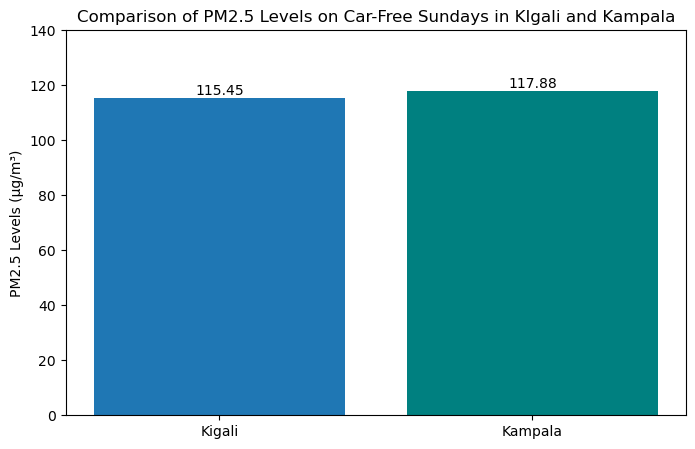

In [41]:

cities = ['Kigali', 'Kampala']
values =  [average_emission_carfree_sundays, average_pm25_kampala]
colors = ['#1f77b4', 'teal']  # Example colors

plt.figure(figsize=(8, 5))
bars = plt.bar(cities, values, color=colors)

# Add text annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

# Enhance aesthetics
plt.ylabel('PM2.5 Levels (µg/m³)')
plt.title('Comparison of PM2.5 Levels on Car-Free Sundays in KIgali and Kampala')
plt.ylim(0, 140)  # Adjust scale for better fit of annotations

plt.show()


**Comparing mondays after Car free sundays in KIgali and respective mondays in Kampala**

In [42]:
#Retrieve monday data fro Kampala that correspond to the mondays after car free sundays in Kigali
kampala_monday_data =final_df[(final_df["Day Name"] == "Monday") & (final_df["Week of Month"] ==2) | (final_df["Day Name"] == "Monday") & (final_df["Week of Month"] ==4)]

kampala_monday_data = kampala_monday_data.reset_index(drop=True)
kampala_monday_data.head(2)

,Date,PM25_Kigali,Day Name,Week of Month,PM25_Kampala,PM25_Nairobi
0,2022-02-28,87,Monday,4,123,54
1,2022-03-14,113,Monday,2,118,88


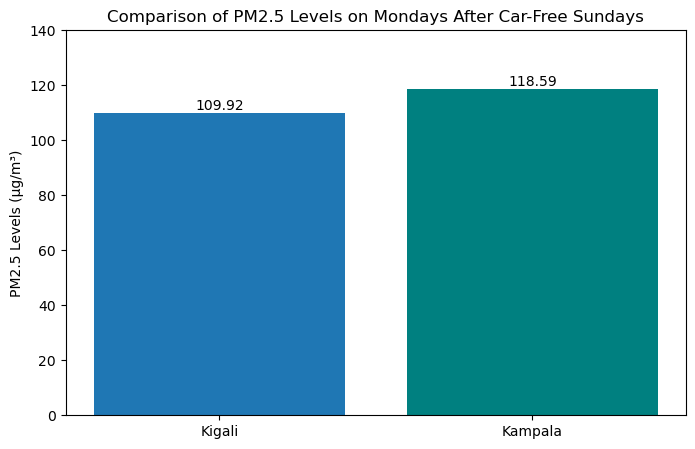

In [43]:
average_pm25_kampala_mondays = kampala_monday_data['PM25_Kampala'].mean()

cities = ['Kigali', 'Kampala']
values =  [average_emission_carfree_mondays,average_pm25_kampala_mondays]
colors = ['#1f77b4', 'teal']  # Example colors

plt.figure(figsize=(8, 5))
bars = plt.bar(cities, values, color=colors)

# Add text annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

# Enhance aesthetics
plt.ylabel('PM2.5 Levels (µg/m³)')
plt.title('Comparison of PM2.5 Levels on Mondays After Car-Free Sundays')
plt.ylim(0, 140)  # Adjust scale for better fit of annotations

plt.show()


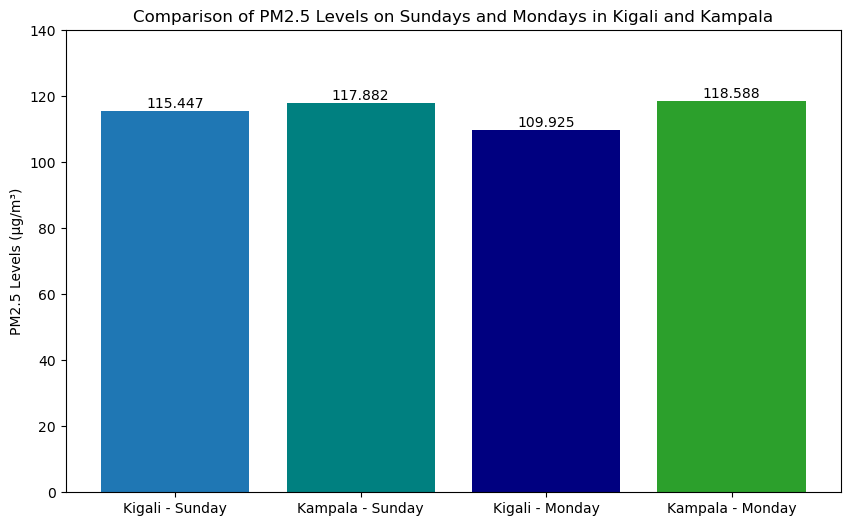

In [44]:
# Define cities and their corresponding values for Sundays and Mondays
cities = ['Kigali - Sunday', 'Kampala - Sunday', 'Kigali - Monday', 'Kampala - Monday']
values = [average_emission_carfree_sundays, average_pm25_kampala, average_emission_carfree_mondays, average_pm25_kampala_mondays]
colors = ['#1f77b4', 'teal', 'navy', '#2ca02c']  # Different colors for each bar

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(cities, values, color=colors)

# Add text annotations on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', va='bottom', ha='center')

# Enhance aesthetics
plt.ylabel('PM2.5 Levels (µg/m³)')
plt.title('Comparison of PM2.5 Levels on Sundays and Mondays in Kigali and Kampala')
plt.ylim(0, 140)  # Adjust scale for better fit of annotations



plt.show()


**Particulate Matter (PM2.5 and PM10)**

AQI_PM25 = [(IHI - ILO) / (BPHI - BPLO)] x (Cp - BPLO) + ILO

Where:

*   AQI_PM25 is the AQI for PM2.5

*  IHI is the AQI value corresponding to the upper boundary of the AQI category
*  ILO is the AQI value corresponding to the lower boundary of the AQI category
*  BPHI is the concentration value corresponding to the upper boundary of the  
AQI category
* BPLO is the concentration value corresponding to the lower boundary of the AQI category
* Cp is the actual concentration of PM2.5 in µg/m³

**Statistical Hypothesis Testing**

- The null hypothesis is that the the mean of Kigali's PM2.5 levels is equal to the mean of Kampala's PM2.5 levels for the observed period.

- The alternative hypothesis is that the two means are not equal.

In [45]:
t_stat, p_value = ttest_ind(final_df['PM25_Kampala'], final_df['PM25_Kigali'])

if p_value <=0.05:
    print(f'The p-value of {p_value} is less than 0.05, \n therefore the null hypothesis is rejected')
    
else:
    print(f'The p-value of {p_value} is greater than 0.05, therefore we fail to reject the null hypothesis.\n\nThis implies that there is no significance difference between the mean of Kigali\'s PM2.5 levels \nand the mean of Kampala\'s PM2.5 levels.')


The p-value of 0.15490695591768958 is greater than 0.05, therefore we fail to reject the null hypothesis.

This implies that there is no significance difference between the mean of Kigali's PM2.5 levels 
and the mean of Kampala's PM2.5 levels.
